In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
result_df_path = '../dataset/final_result.csv'

## Visualize result through boxplot and pointplot

In [3]:
def sns_box_plot(df, metric_of_interest, save = False):
    print(len(df))
    #Melt data into suitable format for plot
    mdf = pd.melt(df,id_vars=['url'], value_name='distance',value_vars=[metric_of_interest+'_month_1', metric_of_interest+'_month_2', metric_of_interest+'_month_3', metric_of_interest+'_month_4', metric_of_interest+'_month_5'])
    mdf['variable'] = mdf['variable'].apply(
        lambda x: 'm 1' if x == metric_of_interest+'_month_1' else ('m 2' if x == metric_of_interest+'_month_2' else ('m 3' if x==metric_of_interest+'_month_3' else ('m 4' if x == metric_of_interest+'_month_4' else 'm 5')))
    )
    senti_df = df[['url','sentiment']]
    mdf = mdf.join(senti_df.set_index('url'), on='url')

    #Plot data
    ax = sns.boxplot(x=mdf['variable'], y=mdf['distance'], hue=mdf['sentiment'], native_scale=True, palette=[ 'skyblue', 'lightgreen', 'tomato'], showfliers=False, showmeans=True)
    ax = sns.pointplot(x=mdf['variable'], y=mdf['distance'], hue=mdf['sentiment'],dodge=.55 , errorbar=None,palette=['skyblue', 'lightgreen',  'tomato'], ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.legend([], [], frameon=False)
    plt.title(metric_of_interest)
    if save:
        plt.savefig(metric_of_interest+'.pdf')
    plt.show()

# Plot all metrics
def display_plot_all(df, save = False):
    sns_box_plot(df,'commits', save=save)
    sns_box_plot(df,'pull_requests', save=save)
    sns_box_plot(df,'stars',save=save)
    sns_box_plot(df,'forks',save=save)
    sns_box_plot(df,'contributors',save=save)

619


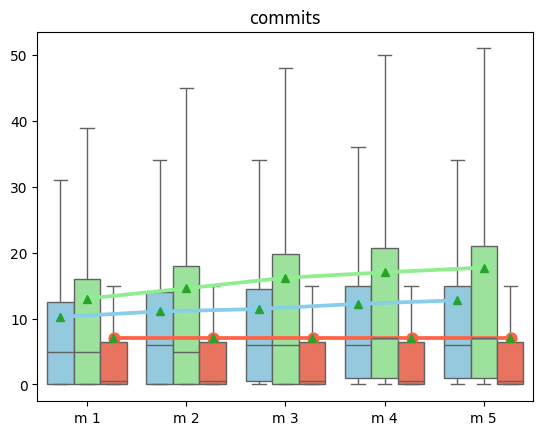

619


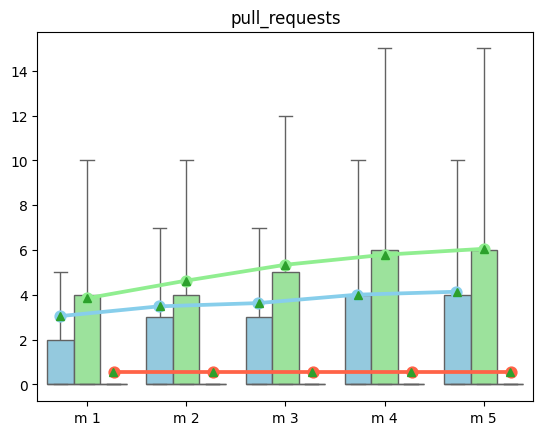

619


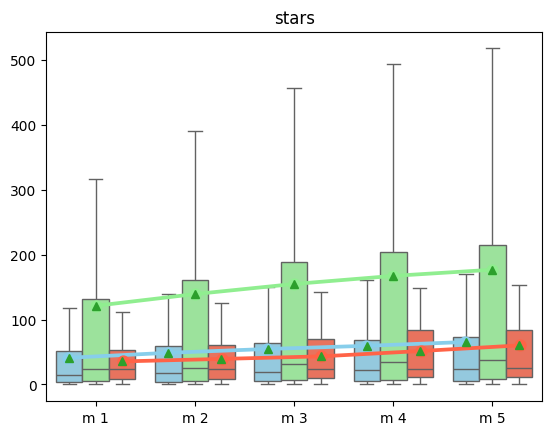

619


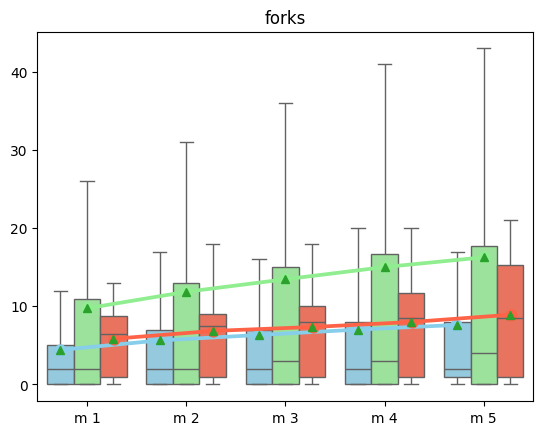

619


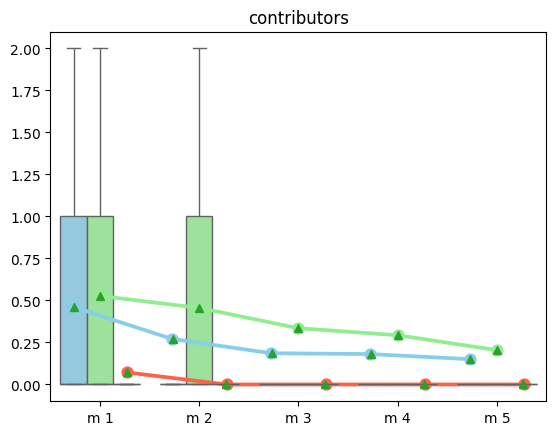

In [ ]:
final_df = pd.read_csv(result_df_path)

display_plot_all(final_df,save=True)